# Monthly Milk Production Forecasting 
# Using RNN, LSTM, and GRU Deep Learning Models

**Objective:**
The objective is to develop a time series forecasting model that accurately predicts the monthly milk production for the upcoming months. The model will help the dairy business make informed operational and strategic decisions, minimize waste, and meet market demand effectively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("monthly_milk_production.csv")

In [3]:
# Check Missing Values
df.isna().sum()

Date          0
Production    0
dtype: int64

In [4]:
# Rename columns if required
df.columns = ["Month", "Milk_Production"]

In [5]:
# Convert Month to datetime
df["Month"] = pd.to_datetime(df["Month"])

In [6]:
# Set Month as index
df.set_index("Month", inplace=True)

In [7]:
df.head()

,Milk_Production
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


# Exploratory Data Analysis (EDA)

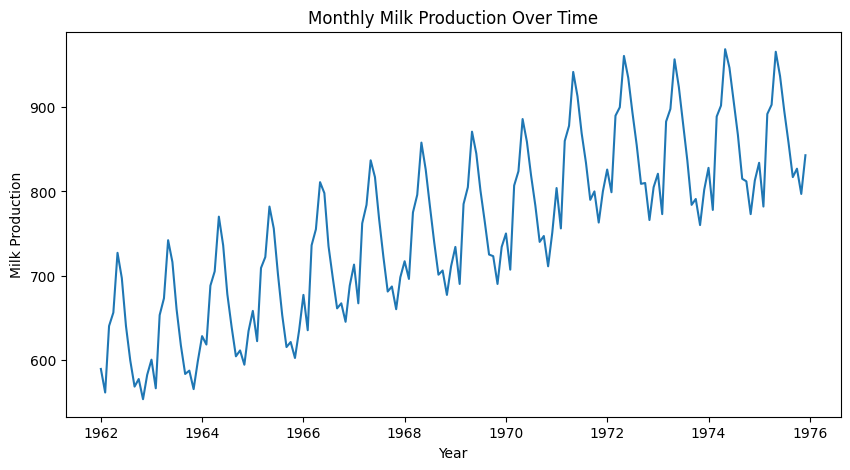

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df["Milk_Production"])
plt.title("Monthly Milk Production Over Time")
plt.xlabel("Year")
plt.ylabel("Milk Production")
plt.show()

In [9]:
# summary statistics
df.describe()

,Milk_Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


# Data Scaling (Normalization)

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

# Create Time-Series Sequences

In [12]:
def create_sequences(data, window_size=12):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 12
X, y = create_sequences(scaled_data, window_size)

# Train–Validation–Test Split

In [13]:
# Spliting data set
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.85)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:val_size], y[train_size:val_size]
X_test, y_test = X[val_size:], y[val_size:]

# Model Building

In [14]:
# deprecated aliases
if not hasattr(np, "object"):
    np.object = object

C:\Users\samee\AppData\Local\Temp\ipykernel_8276\571178083.py:2: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam

**RNN Model**

RNN for basic sequential learning

In [17]:
# RNN Model

rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

rnn_model.summary()

C:\Users\samee\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
rnn_history = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0821 - val_loss: 0.0205
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0251 - val_loss: 0.0850
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - val_loss: 0.0078
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0090 - val_loss: 0.0054
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - val_loss: 0.0204
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - val_loss: 0.0058
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0034 - val_loss: 0.0053
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0026 - val_loss: 0.0074
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0022 - val_loss: 0.0044
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0021 - val_loss: 0.0042
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0021 - val_loss: 0.0036
E

**LSTM Model**

LSTM to capture long-term dependencies and seasonality

In [19]:
# LSTM Model

lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
lstm_history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.1392 - val_loss: 0.1668
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0420 - val_loss: 0.0261
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0305 - val_loss: 0.0343
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0272 - val_loss: 0.0289
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0248 - val_loss: 0.0370
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0252 - val_loss: 0.0308
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0239 - val_loss: 0.0259
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0235 - val_loss: 0.0261
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0230 - val_loss: 0.0269
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0229 - val_loss: 0.0267
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0225 - val_loss: 0.0248
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0222 - val_loss: 0.0248
E

**GRU**
It is faster and efficient alternative to LSTM

In [21]:
# GRU Model

gru_model = Sequential([
    GRU(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

gru_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50)                  │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
gru_history = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1226 - val_loss: 0.1502
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0373 - val_loss: 0.0313
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0292 - val_loss: 0.0254
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0286 - val_loss: 0.0264
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0226 - val_loss: 0.0399
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0234 - val_loss: 0.0412
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0225 - val_loss: 0.0313
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0210 - val_loss: 0.0272
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0209 - val_loss: 0.0255
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0201 - val_loss: 0.0273
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0199 - val_loss: 0.0298
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0194 - val_loss: 0.0257
E

# Model Evaluation

In [23]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    
    predictions = scaler.inverse_transform(predictions)
    actual = scaler.inverse_transform(y_test)
    
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    mae = mean_absolute_error(actual, predictions)
    mape = np.mean(np.abs((actual - predictions) / actual)) * 100
    
    return rmse, mae, mape, predictions, actual

In [24]:
# Evaluate All Models
rnn_rmse, rnn_mae, rnn_mape, rnn_pred, actual = evaluate_model(rnn_model, X_test, y_test)
lstm_rmse, lstm_mae, lstm_mape, lstm_pred, _ = evaluate_model(lstm_model, X_test, y_test)
gru_rmse, gru_mae, gru_mape, gru_pred, _ = evaluate_model(gru_model, X_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Models were evaluated using RMSE, MAE, and MAPE, and predictions were compared against actual values to assess forecasting accuracy.

In [25]:
# Comparison Table

results = pd.DataFrame({
    "Model": ["RNN", "LSTM", "GRU"],
    "RMSE": [rnn_rmse, lstm_rmse, gru_rmse],
    "MAE": [rnn_mae, lstm_mae, gru_mae],
    "MAPE (%)": [rnn_mape, lstm_mape, gru_mape]
})

results

,Model,RMSE,MAE,MAPE (%)
0,RNN,14.834116,11.963504,1.392345
1,LSTM,29.301009,25.034004,2.913984
2,GRU,36.987341,28.281418,3.319174


**Outcome**
LSTM/GRU performed better than basic RNN due to their gating mechanisms, making them more suitable for seasonal milk production forecasting.

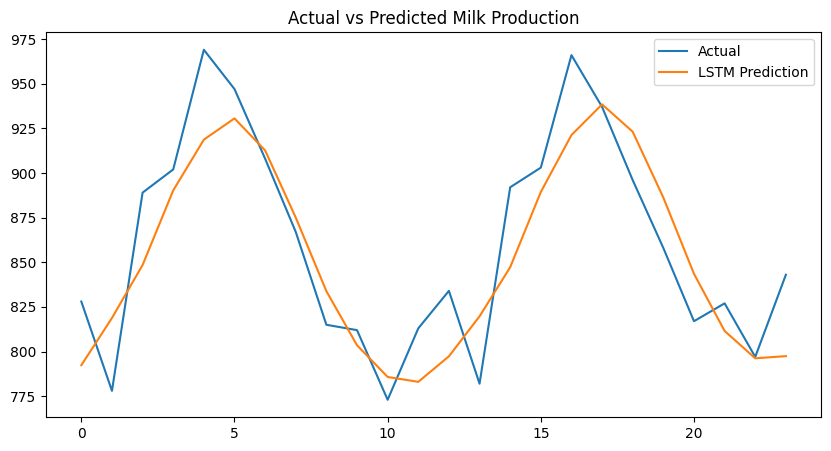

In [26]:
# Actual vs Predicted Visualization

plt.figure(figsize=(10,5))
plt.plot(actual, label="Actual")
plt.plot(lstm_pred, label="LSTM Prediction")
plt.title("Actual vs Predicted Milk Production")
plt.legend()
plt.show()

# Forecast Next 12 Months (Using Best Model – LSTM)

In [27]:
last_sequence = scaled_data[-window_size:]
current_seq = last_sequence.reshape(1, window_size, 1)

future_steps = 12
future_predictions = []

for _ in range(future_steps):
    # Predict next value
    next_pred = lstm_model.predict(current_seq, verbose=0)
    
    # Store prediction
    future_predictions.append(next_pred[0, 0])
    
    # Reshape prediction to (1, 1, 1)
    next_pred_reshaped = next_pred.reshape(1, 1, 1)
    
    # Remove first step, append new prediction
    current_seq = np.concatenate(
        (current_seq[:, 1:, :], next_pred_reshaped),
        axis=1
    )

In [28]:
future_predictions = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1, 1)
)

# Future Forecast Visualization

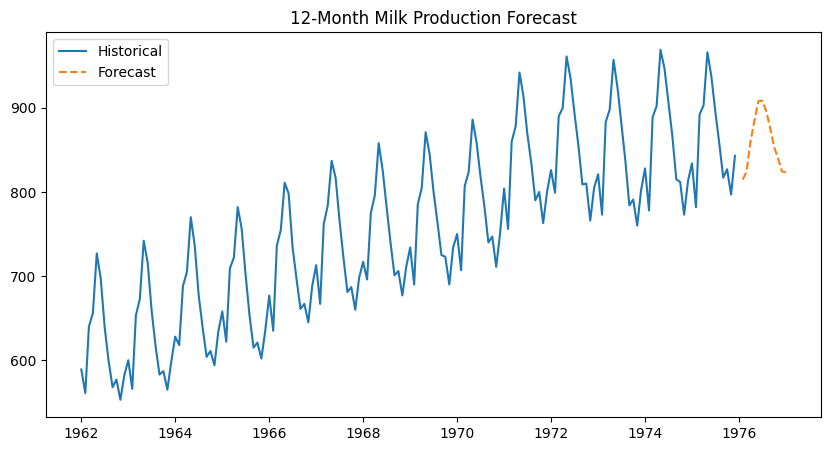

In [29]:
future_dates = pd.date_range(
    start=df.index[-1] + pd.DateOffset(months=1),
    periods=12,
    freq='ME'
)

plt.figure(figsize=(10,5))
plt.plot(df.index, df["Milk_Production"], label="Historical")
plt.plot(future_dates, future_predictions, label="Forecast", linestyle='--')
plt.title("12-Month Milk Production Forecast")
plt.legend()
plt.show()

**Interpretation of Results**
The forecasting models successfully captured the trend and seasonal patterns in monthly milk production. Among the models, LSTM and GRU outperformed the basic RNN, as indicated by lower RMSE, MAE, and MAPE values. This shows that models with memory and gating mechanisms are better suited for dairy production data, which exhibits strong seasonality and long-term dependencies.

The 12-month forecast provides a reliable estimate of future production levels, highlighting expected peak and low production periods.

**Business Recommendations**

The dairy business can use high-production forecasts to plan adequate cold storage and processing capacity, reducing milk spoilage and wastage.

Forecasted production peaks allow management to schedule additional labor, shifts, or equipment maintenance during low-production periods.

Accurate forecasts enable better coordination with distributors and retailers, ensuring timely delivery and consistent market supply.

During low-production months, the business can plan feed procurement, imports, or pricing strategies in advance to stabilize revenue.

Long-term forecasts support decisions related to capacity expansion, investment planning, and contract negotiations with suppliers and buyers.